In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Use a clean style
sns.set(style="whitegrid")


In [4]:
# Step 2: Load Datasets (adjusted for your folder structure)
cheese_df = pd.read_csv("D:/Canadian Sheep Federation Project/cheese_data.csv")
weather_df1 = pd.read_csv("D:/Canadian Sheep Federation Project/canada_weather.csv")
weather_df2 = pd.read_csv("D:/Canadian Sheep Federation Project/Canada_Temperature_Data.csv")
cheese_df.head(), weather_df1.head(), weather_df2.head()


(   CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
 0       228                   NB           Farmstead             47.0   
 1       242                   NB           Farmstead             47.9   
 2       301                   ON          Industrial             54.0   
 3       303                   NB           Farmstead             47.0   
 4       319                   NB           Farmstead             49.4   
 
                                           FlavourEn  \
 0                                     Sharp, lactic   
 1                Sharp, lactic, lightly caramelized   
 2                           Mild, tangy, and fruity   
 3  Sharp with fruity notes and a hint of wild honey   
 4                                      Softer taste   
 
                                    CharacteristicsEn  Organic  \
 0                                           Uncooked        0   
 1                                           Uncooked        0   
 2  Pressed and co

In [5]:
# Step 3: Clean and Prepare Data

# Clean weather data: drop rows where temperature is missing
weather_df2_clean = weather_df2.dropna(subset=["Tm"])

# Get average temperature per province
avg_temp_by_province = (
    weather_df2_clean.groupby("Prov")["Tm"]
    .mean()
    .reset_index()
    .rename(columns={"Tm": "AvgTemperature"})
)

# Clean cheese data: remove missing province codes
cheese_df_clean = cheese_df.dropna(subset=["ManufacturerProvCode"])

# Get cheese count per province
cheese_count_by_province = (
    cheese_df_clean.groupby("ManufacturerProvCode")
    .size()
    .reset_index(name="CheeseCount")
)

# Merge temperature and cheese count on province code
merged_df = pd.merge(
    avg_temp_by_province,
    cheese_count_by_province,
    left_on="Prov",
    right_on="ManufacturerProvCode"
).drop(columns="ManufacturerProvCode")

# Show merged data
merged_df


,Prov,AvgTemperature,CheeseCount
0,AB,4.443528,13
1,BC,6.848785,65
2,MB,1.996501,11
3,NB,4.743894,27
4,NL,3.661499,2
5,NS,6.374093,10
6,ON,5.689031,115
7,PE,5.594824,2
8,QC,3.525982,796
9,SK,2.467776,1


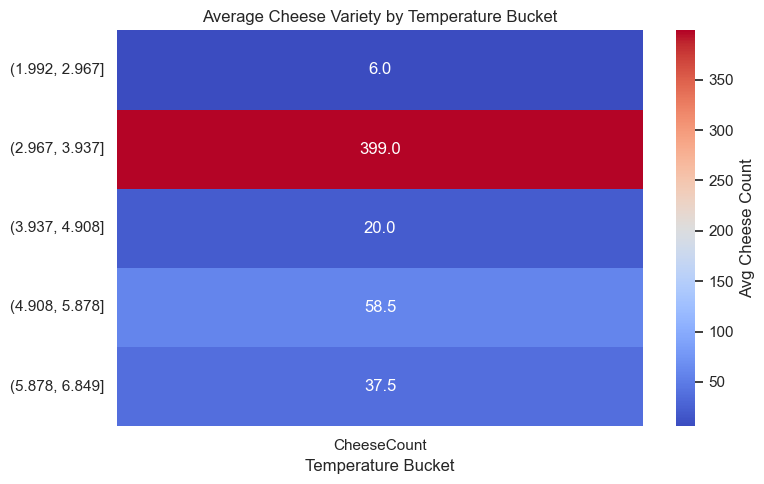

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create temperature buckets and calculate average cheese count
pivot_df = merged_df.copy()
pivot_df["Temp_Bucket"] = pd.cut(pivot_df["AvgTemperature"], bins=5)
heatmap_data = pivot_df.groupby("Temp_Bucket")["CheeseCount"].mean().reset_index()

# Convert to pivot format
heatmap_data_pivot = heatmap_data.pivot_table(values="CheeseCount", index="Temp_Bucket")

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data_pivot, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Avg Cheese Count'})
plt.title("Average Cheese Variety by Temperature Bucket")
plt.xlabel("Temperature Bucket")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [ ]:
# Filter provinces with more than 10 cheeses
top_provinces = cheese_df_clean['ManufacturerProvCode'].value_counts().loc[lambda x: x > 10].index
filtered_cheese = cheese_df_clean[cheese_df_clean['ManufacturerProvCode'].isin(top_provinces)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="ManufacturerProvCode", y="MoisturePercent", data=filtered_cheese)
plt.title("Distribution of Cheese Moisture Percent by Province")
plt.xlabel("Province")
plt.ylabel("Moisture %")
plt.tight_layout()
plt.show()


Based on the visualizations and data analysis:

### 🌡️ Temperature and Cheese Variety (Heatmap)
- The **heatmap** shows that provinces with **moderate temperatures** (not the hottest or coldest) tend to have the **highest average cheese variety**.
- Cheese production appears to **decrease** in both **extremely cold** and **warmer** provinces.
- This suggests a **weak inverse-U relationship**, where **temperate climates** might be most suitable for diverse cheese production.

### 💧 Moisture Content by Province (Boxplot)
- The **boxplot** indicates a **wide range of moisture levels** in cheeses across different provinces.
- Some provinces, like **Ontario and Quebec**, show **greater variability** in moisture, which could reflect the **diversity of cheese styles**.
- This variability may correlate with **infrastructure and market diversity** rather than climate alone.

### 🧠 Conclusion:
While weather—especially temperature—has some impact on the number and style of cheeses produced (as moderate climates correlate with higher variety), **economic, cultural, and industrial** factors likely play a much larger role in shaping cheese production trends across Canada.
